In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#load dataset
df = pd.read_csv("Pharma_Industry.csv")

#first 5rows
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [26]:
#datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [27]:
#statistical summary (mean, std, min, max)
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [28]:
#checking missing value
df.isnull().sum()

#No missing value is found

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

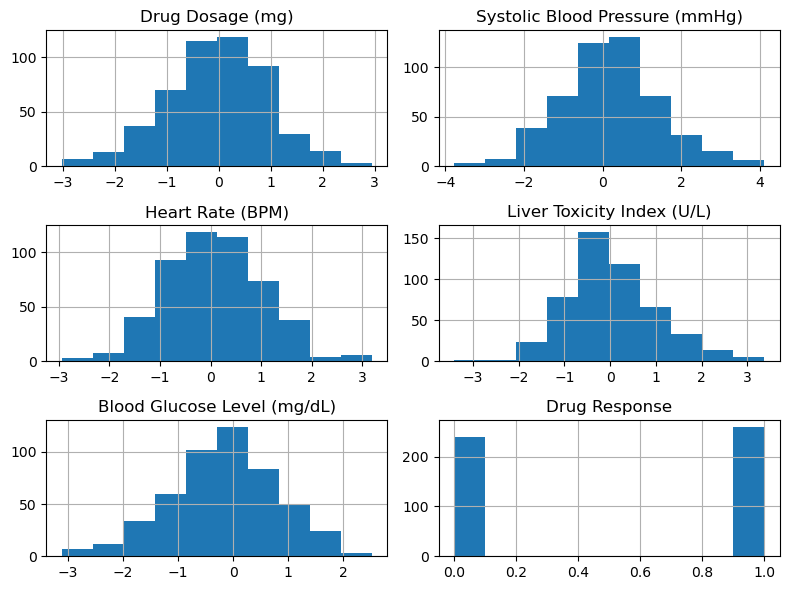

In [29]:
#Histogram
  
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()


In [ ]:
Histogram helps to identify skewness:
      * X variables are drug dosage, blood pressure, heart rate, liver toxicity, and blood glucose show an approximately normal (bell-shaped)
distribution, suggesting the data is well-balanced with no extreme skewness.
      * This indicates low presence of outliers
      * The drug response plot is binary (0 and 1), showing two clear groups, which indicates this is a classification outcome variable Y.


In [30]:
X = df.iloc[:,0:5]
Y = df["Drug Response"]

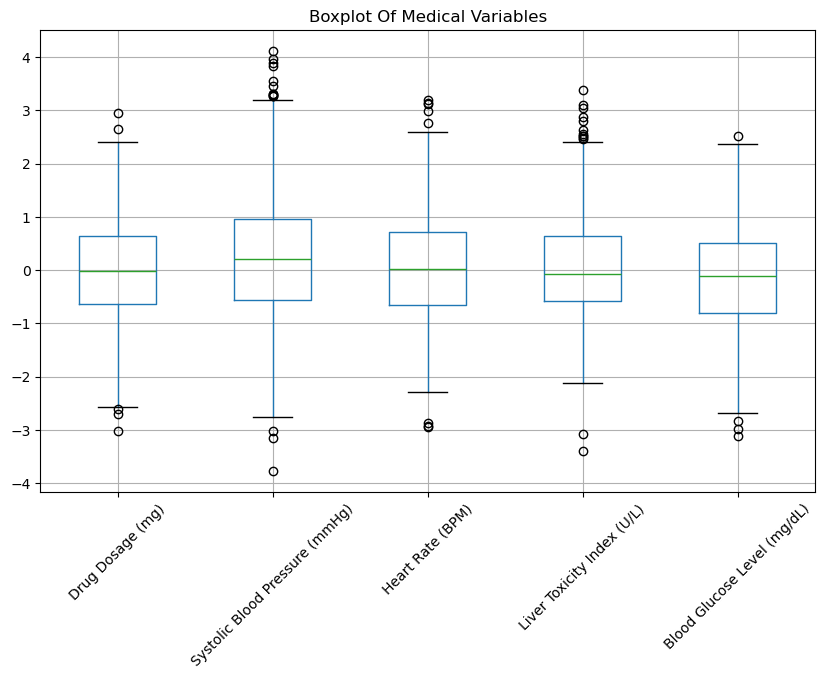

In [31]:
#Boxplot (Outlier Detection)
plt.figure(figsize=(10,6))
X.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Of Medical Variables")
plt.show()

In [32]:
Boxplot:
   *Outliers are seemed to be less.
   *Blood Glucose level and drug dosage have less outleirs compared to others.
   *outliers treatment to be treated.

SyntaxError: invalid syntax (3397308500.py, line 1)

In [33]:
#Treating outlier
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
IQR_df = pd.DataFrame({
    "Q1": Q1,
    "Q3":Q3,
    "IQR":IQR})
IQR_df

,Q1,Q3,IQR
Drug Dosage (mg),-0.642003,0.641151,1.283153
Systolic Blood Pressure (mmHg),-0.565168,0.951375,1.516543
Heart Rate (BPM),-0.648157,0.710774,1.358931
Liver Toxicity Index (U/L),-0.586085,0.633914,1.219999
Blood Glucose Level (mg/dL),-0.797715,0.513555,1.311270


In [34]:
#Replace outliers with their upper or lower limit
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replaces outliers by capping values within the calculated lower and upper bounds for each column
X = X.clip(lower=lower_bound, upper=upper_bound, axis=1) 

In [35]:
#Checking outliers is correctly replaced or not by sum of all outliers.
outliers_after = ((X < (Q1 - 1.5 * IQR)) | 
                   (X > (Q3 + 1.5 * IQR))).any(axis=1)

print("No of Outlier after:",outliers_after.sum()) #zero outliers indicates correctly replaced values 


No of Outlier after: 0


In [36]:
df.corr()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.090618,0.040571,0.128127,0.012434,0.043457
Systolic Blood Pressure (mmHg),0.090618,1.000000,-0.039195,0.283672,0.037228,0.305226
Heart Rate (BPM),0.040571,-0.039195,1.000000,0.005818,0.049897,-0.009715
Liver Toxicity Index (U/L),0.128127,0.283672,0.005818,1.000000,0.229474,0.434722
Blood Glucose Level (mg/dL),0.012434,0.037228,0.049897,0.229474,1.000000,0.169342
Drug Response,0.043457,0.305226,-0.009715,0.434722,0.169342,1.000000


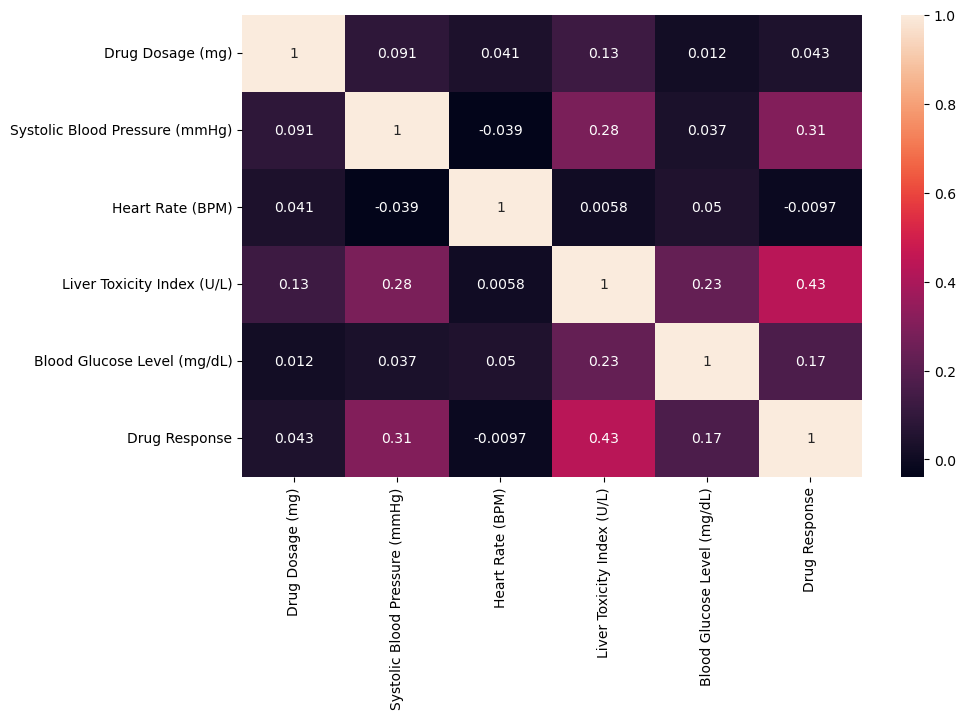

In [37]:
#correaltion heatmap->Helps detect multicollinearity
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [38]:
#Split dataset 80% training & 20% testing
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
#fitting basic svc model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)


SVC()

In [40]:
#predicting Y values
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

score = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy score:", np.round(score, 2)) 

r_score_test = recall_score(Y_test,Y_pred_test)
print("Test Sensitivity score :",np.round(r_score_test,2))

precision_score_test = precision_score(Y_test,Y_pred_test)
print("Test precision score :",np.round(precision_score_test,2))

f1_score_test= f1_score(Y_test,Y_pred_test)
print("Test f1 score:",np.round(f1_score_test,2))

Test Accuracy score: 0.82
Test Sensitivity score : 0.8
Test precision score : 0.87
Test f1 score: 0.83


In [ ]:
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#SVM hyperparamaters:
#1.linear
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


In [ ]:
# 2.Polynomial classifier
from sklearn.svm import SVC
model = SVC(kernel='poly',degree=3)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


In [ ]:
# 3.Radial basis classifier
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


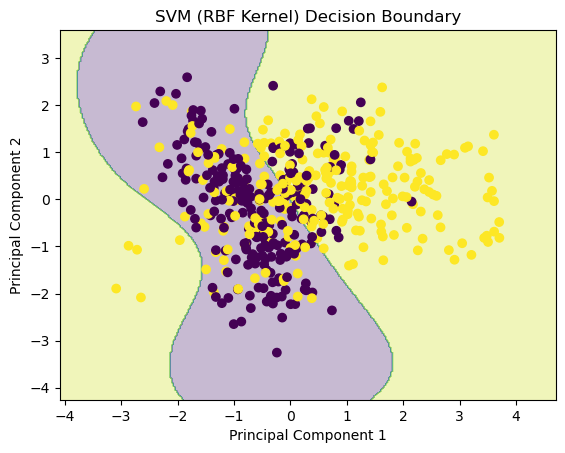

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train SVM with RBF kernel
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_pca, Y)

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM (RBF Kernel) Decision Boundary")
plt.show()


In [ ]:
1. Linear Kernel

  *The training score (0.70) is relatively low compared to the test score (0.77).
  *This indicates underfitting, suggesting the dataset is not linearly separable.
  *Linear kernel fails to capture complex relationships observed in EDA visualizations.

Conclusion:
Suitable only when data has a simple linear structure.

In [ ]:
2. Polynomial Kernel

   *Shows improvement in both training (0.75) and test (0.78) scores.
   *Able to capture some non-linear patterns in the data.
   *Moderate gap between training and test scores indicates better generalization than linear kernel.

Conclusion:
Performs better than linear but still limited for complex boundaries.

In [ ]:
3. Radial Basis Function (RBF) Kernel

   *Achieves the highest training (0.79) and test score (0.82).
   *Demonstrates strong ability to model complex non-linear relationships.
   *Balanced scores indicate good generalization without overfitting.

Conclusion:
Best-performing kernel for this dataset.

In [ ]:
     *Among the three SVM kernels, the RBF kernel demonstrates superior performance with the highest training and test scores, indicating its
effectiveness in capturing non-linear patterns present in the dataset.    
     *The polynomial kernel provides moderate improvement, while the linear kernel underperforms
due to the non-linear nature of the data.
      *RBF kernel clearly outperforms others
      *Polynomial kernel offers moderate improvement
      *Linear kernel struggles with non-linear data

RBF kernel performed best because the dataset is non-linearly separable and contains complex feature relationships.

In [ ]:
Strengths of SVM (Observed from EDA & Plots)
  1.Handles High-Dimensional Data Well
     *From EDA, the dataset contains multiple numerical features.
     *Correlation heatmaps showed that not all features are strongly correlated.
     *SVM performs well in such feature spaces because it focuses on finding an optimal separating hyperplane.

  2.Effective with Clear Class Separation
     *Scatter plots and PCA visualizations indicated partial separation between classes.
     *SVM maximizes the margin between classes, which improves generalization.
     *This makes SVM suitable when class boundaries are not obvious but still separable.

  3.Robust to Overfitting (with Proper Regularization)
     *Boxplots showed presence of some outliers.
     *With appropriate C value, SVM can ignore minor noise while still learning meaningful patterns.

  4.Kernel Trick Captures Non-Linear Patterns
     *Visualizations indicated non-linear relationships between features.
     *RBF and polynomial kernels helped capture complex decision boundaries better than linear models.

In [ ]:
Weaknesses of SVM (Observed from EDA & Visualizations)

  1.Sensitive to Feature Scaling
     *EDA showed features with different ranges.
     *Without standardization, SVM performance degraded.
     *This confirms that scaling is mandatory for SVM.

  2.Computationally Expensive
     *As dataset size increases, training time increases significantly.
     *GridSearch visualizations showed longer tuning times compared to simpler models.

  3.Difficult to Interpret
     *Unlike Logistic Regression, SVM does not provide clear feature importance.
     *Decision boundary plots explain results visually but not numerically.

  4.Performance Depends Heavily on Kernel Choice
      *Kernel comparison plots showed different accuracy levels.
      *Wrong kernel selection can lead to underfitting or overfitting.

In [ ]:
Practical Implications of SVM in Real-World Classification Tasks:
  1.Medical & Pharmaceutical Industry
       *Drug response prediction
       *Disease classification
       *Patient risk stratification
       *SVM is reliable where accuracy is more important than interpretability

  2.Bioinformatics
       *Gene classification
       *Protein structure prediction
       *Works well with high-dimensional biological data

  3.Text & Image Classification
       *Spam detection
       *Sentiment analysis
       *Face recognition
       *SVM handles sparse and complex feature spaces efficiently

In [ ]:
When NOT to Use SVM
    *Very large datasets (slow training)
    *When model interpretability is critical
    *When data is extremely noisy without clear patterns